<a href="https://colab.research.google.com/github/erikamarchi/pandas-formatos-diferentes-de-entrada-e-saida-io/blob/main/Pandas_IO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fonte dos dados
API de serviço de dados do IBGE utilizada para popular os nomes dos alunos

In [1]:
import pandas as pd

In [2]:
nomesConsideradosFemininos = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')
nomesConsideradosMasculinos = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')

In [3]:
print(f'Quantidade total de nomes {len(nomesConsideradosFemininos) + len(nomesConsideradosMasculinos)}')

Quantidade total de nomes 400


In [4]:
listaNomes = [nomesConsideradosFemininos,nomesConsideradosMasculinos]
listaNomes

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   198

In [8]:
dfNomes = pd.concat(listaNomes)['nome'].to_frame()
dfNomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO


In [9]:
#Amostra
nomes.sample(5)

,nome
110,LUCIENE
95,ALESSANDRO
55,FLAVIO
187,ELTON
157,JAIME


#Identificação dos alunos

In [10]:
import numpy as np

In [11]:
np.random.seed(123)

In [12]:
totalAlunos = len(dfNomes)
totalAlunos

400

In [13]:
dfNomes['id_aluno'] = np.random.permutation(totalAlunos)+1
dfNomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


In [14]:
dfNomes = dfNomes[['id_aluno','nome']]
dfNomes

,id_aluno,nome
0,235,MARIA
1,43,ANA
2,304,FRANCISCA
3,156,ANTONIA
4,343,ADRIANA
...,...,...
195,231,WALTER
196,99,ARLINDO
197,323,MICHAEL
198,383,ALVARO


In [15]:
dfNomes.sample(5)

,id_aluno,nome
188,369,POLIANA
57,303,DAIANE
3,382,FRANCISCO
182,33,CHARLES
30,111,ANDERSON


In [16]:
dominios = ['@dominiodoemail.com.br','@servicodoemail.com']
dfNomes['dominio'] = np.random.choice(dominios, totalAlunos)
dfNomes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id_aluno,nome,dominio
0,235,MARIA,@dominiodoemail.com.br
1,43,ANA,@servicodoemail.com
2,304,FRANCISCA,@servicodoemail.com
3,156,ANTONIA,@dominiodoemail.com.br
4,343,ADRIANA,@servicodoemail.com
...,...,...,...
195,231,WALTER,@dominiodoemail.com.br
196,99,ARLINDO,@servicodoemail.com
197,323,MICHAEL,@dominiodoemail.com.br
198,383,ALVARO,@dominiodoemail.com.br


In [17]:
dfNomes['e-mail'] = dfNomes.nome.str.cat(dfNomes.dominio).str.lower()
dfNomes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id_aluno,nome,dominio,e-mail
0,235,MARIA,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,43,ANA,@servicodoemail.com,ana@servicodoemail.com
2,304,FRANCISCA,@servicodoemail.com,francisca@servicodoemail.com
3,156,ANTONIA,@dominiodoemail.com.br,antonia@dominiodoemail.com.br
4,343,ADRIANA,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,231,WALTER,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,99,ARLINDO,@servicodoemail.com,arlindo@servicodoemail.com
197,323,MICHAEL,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,383,ALVARO,@dominiodoemail.com.br,alvaro@dominiodoemail.com.br


#Criando a tabela dos cursos
Lê de página html para popular o nosso dataframe

In [18]:
!pip3 install html5lib
!pip3 install lxml

In [20]:
import html5lib

In [21]:
urlPaginaCursos = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(urlPaginaCursos)
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [22]:
type(cursos)

list

In [23]:
dfCursos = cursos[0]
type(dfCursos)

pandas.core.frame.DataFrame

In [24]:
dfCursos

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


#Cria identificação para o curso

In [25]:
dfCursos.rename(columns={'Nome do curso':'nome_do_curso'}, inplace=True)

In [27]:
dfCursos.head()

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [28]:
dfCursos['id'] = dfCursos.index + 1
dfCursos.set_index('id',inplace=True)
dfCursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


#Matriculando os alunos nos cursos

In [29]:
dfNomes['matriculas'] = np.ceil(np.random.exponential(size=totalAlunos)*1.5).astype(int)
dfNomes.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id_aluno,nome,dominio,e-mail,matriculas
0,235,MARIA,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,43,ANA,@servicodoemail.com,ana@servicodoemail.com,5
2,304,FRANCISCA,@servicodoemail.com,francisca@servicodoemail.com,1
3,156,ANTONIA,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,5
4,343,ADRIANA,@servicodoemail.com,adriana@servicodoemail.com,1


In [32]:
dfNomes.matriculas.describe()

count    400.000000
mean       2.120000
std        1.498738
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max       10.000000
Name: matriculas, dtype: float64

In [47]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.color_palette("viridis", as_cmap=True)

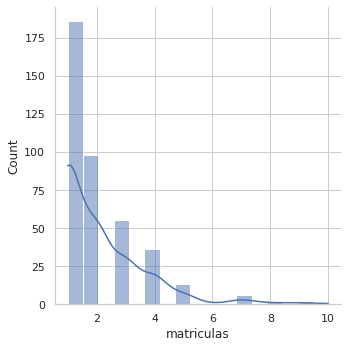

In [51]:
sns.displot(dfNomes.matriculas, kde=True, palette='viridis');


In [52]:
dfNomes.matriculas.value_counts()

1     186
2      98
3      55
4      36
5      13
7       6
9       2
8       2
10      1
6       1
Name: matriculas, dtype: int64

#Selecionando os cursos

In [55]:
listaMatriculas = []
x = np.random.rand(20)
probabilidade = x / sum(x)
probabilidade

array([0.07054604, 0.05771161, 0.03480604, 0.08262416, 0.04960021,
       0.05695614, 0.02101626, 0.04674823, 0.05995411, 0.0368285 ,
       0.00561048, 0.05334995, 0.0805473 , 0.03252609, 0.03396554,
       0.07315563, 0.05584965, 0.07627847, 0.01891554, 0.05301005])

In [65]:
for index, row in dfNomes.iterrows():
  id = row.id_aluno
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(dfCursos.index, p = probabilidade)]
    listaMatriculas.append(mat)
    
matriculas = pd.DataFrame(listaMatriculas, columns = ['id_aluno', 'id_curso'])
matriculas.head()

,id_aluno,id_curso
0,235,8
1,43,17
2,43,10
3,43,8
4,43,9


In [66]:
matriculas.shape

(1696, 2)

In [68]:
matriculas.groupby('id_curso').count().join(dfCursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,125,Lógica de programação
2,90,Java para Web
3,70,C# para Web
4,146,Ruby on Rails
5,80,Cursos de Python
6,114,PHP com MySql
7,28,.NET para web
8,77,Novas integrações com Java
9,108,TDD com Java


In [70]:
dfNomes.head(10)

,id_aluno,nome,dominio,e-mail,matriculas
0,235,MARIA,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,43,ANA,@servicodoemail.com,ana@servicodoemail.com,5
2,304,FRANCISCA,@servicodoemail.com,francisca@servicodoemail.com,1
3,156,ANTONIA,@dominiodoemail.com.br,antonia@dominiodoemail.com.br,5
4,343,ADRIANA,@servicodoemail.com,adriana@servicodoemail.com,1
5,310,JULIANA,@servicodoemail.com,juliana@servicodoemail.com,1
6,55,MARCIA,@dominiodoemail.com.br,marcia@dominiodoemail.com.br,2
7,288,FERNANDA,@servicodoemail.com,fernanda@servicodoemail.com,2
8,379,PATRICIA,@servicodoemail.com,patricia@servicodoemail.com,1
9,92,ALINE,@dominiodoemail.com.br,aline@dominiodoemail.com.br,1


In [71]:
dfCursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [72]:
matriculas.head()

,id_aluno,id_curso
0,235,8
1,43,17
2,43,10
3,43,8
4,43,9


In [74]:
matriculasPorCurso = matriculas.groupby('id_curso').count().join(dfCursos['nome_do_curso']).rename(columns={'id_aluno':'quantidade_de_alunos'})
matriculasPorCurso.head()

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,125,Lógica de programação
2,90,Java para Web
3,70,C# para Web
4,146,Ruby on Rails
5,80,Cursos de Python


#Saída em diferentes formatos

##Em .csv

In [75]:
matriculasPorCurso.to_csv('matriculas_por_curso.csv', index=False)

In [76]:
dados = pd.read_csv('matriculas_por_curso.csv')
dados.head()

,quantidade_de_alunos,nome_do_curso
0,125,Lógica de programação
1,90,Java para Web
2,70,C# para Web
3,146,Ruby on Rails
4,80,Cursos de Python


##Em json

In [77]:
matriculasJson = matriculasPorCurso.to_json()
matriculasJson

'{"quantidade_de_alunos":{"1":125,"2":90,"3":70,"4":146,"5":80,"6":114,"7":28,"8":77,"9":108,"10":56,"11":9,"12":81,"13":119,"14":62,"15":56,"16":128,"17":85,"18":132,"19":32,"20":98},"nome_do_curso":{"1":"L\\u00f3gica de programa\\u00e7\\u00e3o","2":"Java para Web","3":"C# para Web","4":"Ruby on Rails","5":"Cursos de Python","6":"PHP com MySql","7":".NET para web","8":"Novas integra\\u00e7\\u00f5es com Java","9":"TDD com Java","10":"C\\u00f3digo limpo com C#","11":"Preparat\\u00f3rio para certifica\\u00e7\\u00e3o Java","12":"Hardware b\\u00e1sico","13":"Persist\\u00eancia com .NET","14":"Desenvolvendo jogos","15":"An\\u00e1lise de dados","16":"Estat\\u00edstica b\\u00e1sica","17":"Internet das coisas","18":"Programa\\u00e7\\u00e3o funcional","19":"Boas pr\\u00e1ticas em Java","20":"Orienta\\u00e7\\u00e3o objetos com Java"}}'

##Em html

In [79]:
matriculasHtml = matriculasPorCurso.to_html()
print(matriculasHtml)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>125</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>90</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>70</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>146</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>80</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>114</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>28</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>77</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>108</